In [2]:
import qiskit
%set_env QXToken=bac16a78a963089b5137c432ee3e44bd3d99daf9168de72ee8bf62ef9f73f04b51d6838264865e632e49a563e1b5e3966565f2dc768c8afad3ee6acbf0fe676a


# imports
import numpy as np
from typing import List, Callable
from scipy.optimize import minimize
from scipy.optimize._optimize import OptimizeResult
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator, SparsePauliOp
from qiskit.primitives import StatevectorSampler, PrimitiveJob
from qiskit.circuit.library import TwoLocal
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime.fake_provider import FakeSherbrooke
from qiskit_ibm_runtime import Session, EstimatorV2 as Estimator
from qiskit_aer import AerSimulator

env: QXToken=bac16a78a963089b5137c432ee3e44bd3d99daf9168de72ee8bf62ef9f73f04b51d6838264865e632e49a563e1b5e3966565f2dc768c8afad3ee6acbf0fe676a


In [4]:
# Setup the grader
from qc_grader.challenges.iqc_2024 import (
    grade_lab1_ex1,
    grade_lab1_ex2,
    grade_lab1_ex3,
    grade_lab1_ex4,
    grade_lab1_ex5,
    grade_lab1_ex6,
    grade_lab1_ex7,
)

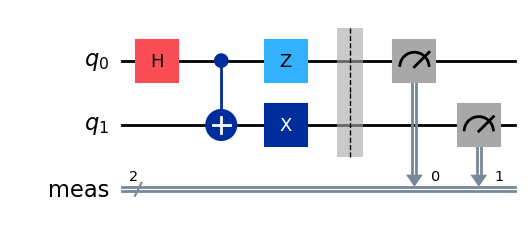

In [21]:
# Build a circuit to form a psi-minus Bell state
# Apply gates to the provided QuantumCircuit, qc

qc = QuantumCircuit(2)

### Write your code below here ###

qc.h(0)

# Apply CNOT gate (control on qubit 0, target on qubit 1)
qc.cx(0, 1)

qc.z(0)

qc.x(1)

### Don't change any code past this line ###
qc.measure_all()
qc.draw('mpl')

In [22]:
# Submit your answer using following code

grade_lab1_ex1(qc) # Expected result type: QuantumCircuit

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [27]:
qc.measure_all()

### Write your code below here ###

# Initialize the Sampler primitive
sampler = StatevectorSampler()


# Execute the sampler job
job_sampler = sampler.run([qc])
### Don't change any code past this line ###

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

print(counts_sampler)

{'01': 516, '10': 508}


In [28]:
# Submit your answer using following code

grade_lab1_ex2(job_sampler) # Expected result type: PrimitiveJob

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


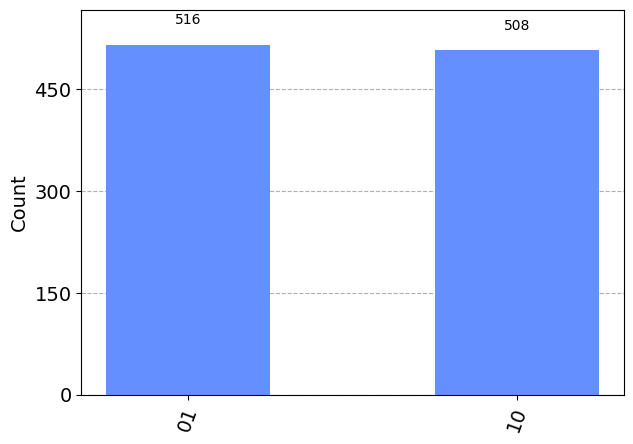

In [29]:
plot_histogram(counts_sampler)

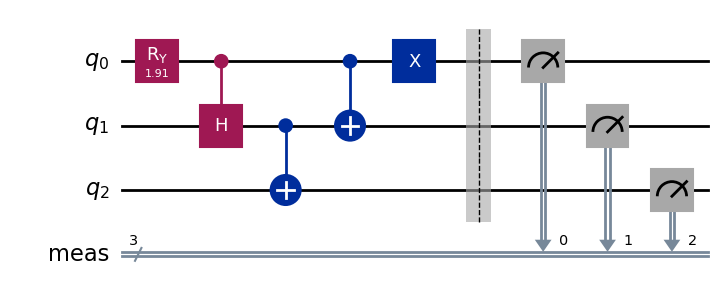

In [32]:
# Step 1
qc = QuantumCircuit(3)

# Step 2 (provided)
qc.ry(1.91063324, 0)

# Add steps 3-6 below

#Perform a controlled hadamard gate on qubit 1, with control qubit 0
qc.ch(0, 1)

#Add a CNOT gate with control qubit 1 and target qubit 2
qc.cx(1, 2)

#Add a CNOT gate with control qubit 0 and target qubit 1
qc.cx(0, 1)

#Add a X gate on qubit 0
qc.x(0)

### Don't change any code past this line ###
qc.measure_all()
qc.draw('mpl')

In [33]:
# Submit your answer using following code

grade_lab1_ex3(qc) # Expected result type: # Expected result type: QuantumCircuit

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [34]:
sampler = StatevectorSampler()
pub = (qc)
job_sampler = sampler.run([pub], shots=10000)

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

print(counts_sampler)

{'100': 3348, '001': 3351, '010': 3301}


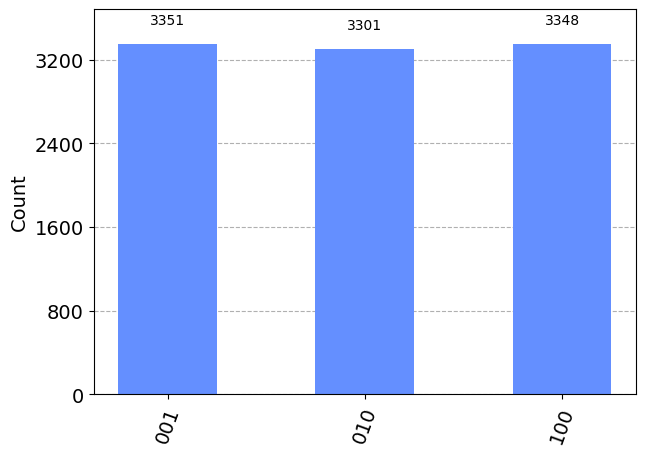

In [35]:
plot_histogram(counts_sampler)

In [36]:
pauli_op = SparsePauliOp(['ZII', 'IZI', 'IIZ'])
print(pauli_op.to_matrix())

[[ 3.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -3.+0.j]]


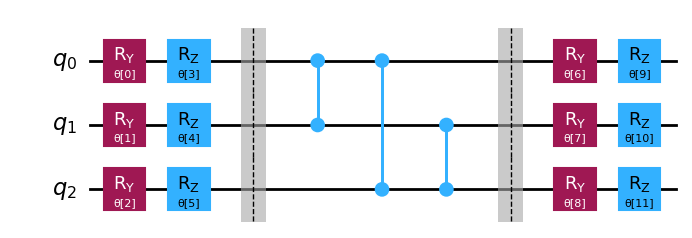

In [37]:
num_qubits = 3
rotation_blocks = ['ry', 'rz']
entanglement_blocks = 'cz'
entanglement = 'full'

ansatz = TwoLocal(num_qubits=num_qubits, rotation_blocks=rotation_blocks, 
                  entanglement_blocks=entanglement_blocks, entanglement=entanglement, 
                  reps=1, insert_barriers=True)



### Don't change any code past this line ###
ansatz.decompose().draw('mpl')

In [38]:
# Submit your answer using following code

grade_lab1_ex4(num_qubits, rotation_blocks, entanglement_blocks, entanglement) # Expected result type: int, List[str], str, str

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [39]:
num_params = ansatz.num_parameters
num_params

12

In [42]:
backend_answer = FakeSherbrooke()
optimization_level_answer = 3
pm = generate_preset_pass_manager(backend=backend_answer,optimization_level=optimization_level_answer)
isa_circuit = pm.run(ansatz)

In [43]:
# Submit your answer using following code

grade_lab1_ex5(isa_circuit) # Expected result type: QuantumCircuit

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


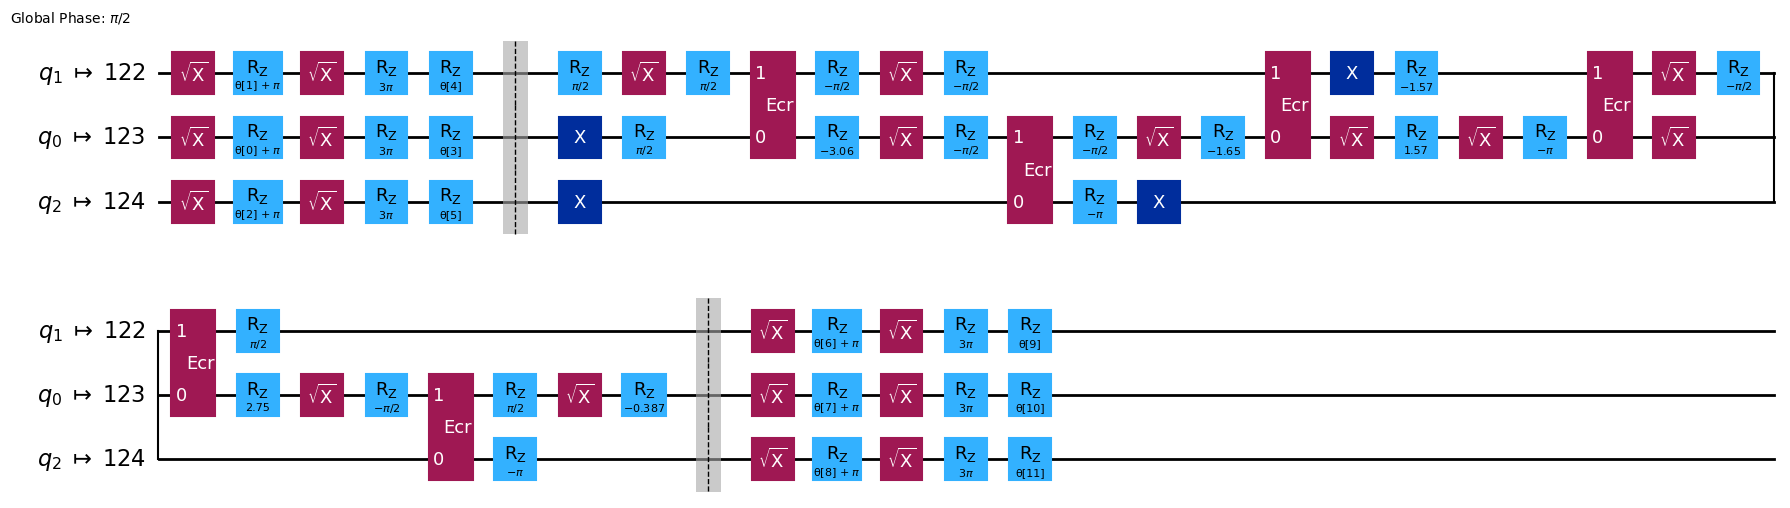

In [44]:
isa_circuit.draw('mpl', idle_wires=False,)

In [45]:
# Define our Hamiltonian
hamiltonian_isa = pauli_op.apply_layout(layout=isa_circuit.layout)

In [46]:
def cost_func(params, ansatz, hamiltonian, estimator, callback_dict):
    """Return estimate of energy from estimator

    Parameters:
        params (ndarray): Array of ansatz parameters
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        hamiltonian (SparsePauliOp): Operator representation of Hamiltonian
        estimator (EstimatorV2): Estimator primitive instance

    Returns:
        float: Energy estimate
    """
    pub = (ansatz)
    result = estimator.run([(pub, hamiltonian, [params])]).result()
    energy = result[0].data.evs[0]

    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = params
    callback_dict["cost_history"].append(energy)


### Don't change any code past this line ###
    print(energy)
    return energy, result

In [47]:
# Submit your answer using following code

grade_lab1_ex6(cost_func) # Expected result type: Callable

[0.67675781]
Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [48]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}

In [49]:
x0 = 2 * np.pi * np.random.random(num_params)
x0

array([0.35902235, 3.91038455, 0.33355089, 3.21954857, 2.97554812,
       3.52894195, 4.45045605, 4.86928441, 1.30777529, 0.16276458,
       2.01609089, 5.9343312 ])

In [51]:
### Select a Backend
## Use FakeSherbrooke to simulate with noise that matches closer to the real experiment. This will run slower.
## Use AerSimulator to simulate without noise to quickly iterate. This will run faster.

#backend = FakeSherbrooke()
backend = AerSimulator()

# ### Don't change any code past this line ###

# Here we have updated the cost function to return only the energy to be compatible with recent scipy versions (>=1.10)
def cost_func_2(*args, **kwargs):
    energy, result = cost_func(*args, **kwargs)
    return energy

with Session(backend=backend) as session:
    estimator = Estimator(session=session)

    res = minimize(
        cost_func_2,
        x0,
        args=(isa_circuit, hamiltonian_isa, estimator, callback_dict),
        method="cobyla",
        options={'maxiter': 30})

0.4931640625
0.82958984375
0.89599609375
-0.68408203125
-0.69580078125
-0.740234375
-0.31201171875
0.1181640625
-1.31494140625
-1.48486328125
-1.4501953125
-1.44287109375
-1.45361328125
-1.74951171875
-2.30859375
-1.2333984375
-1.9765625
-2.7216796875
-1.78564453125
-2.74169921875
-2.47119140625
-2.4638671875
-2.654296875
-2.75927734375
-2.50732421875
-2.7509765625
-2.08203125
-2.71875
-2.10498046875
-2.7978515625


In [52]:
# Submit your answer using following code

grade_lab1_ex7(res) # Expected result type: OptimizeResult

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


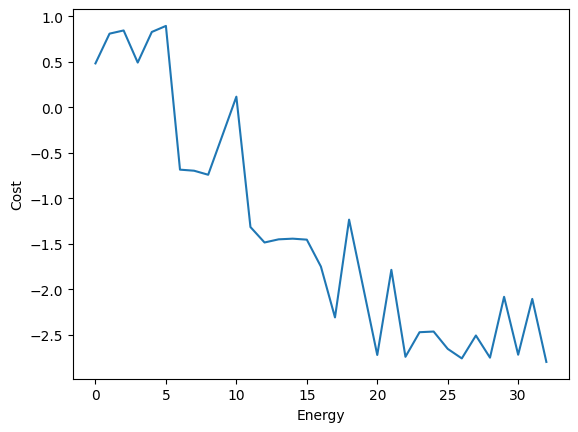

In [53]:
fig, ax = plt.subplots()
plt.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
plt.xlabel("Energy")
plt.ylabel("Cost")
plt.draw()